In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号

In [56]:
# 读取文件并获取数据
def getData(fName): 
    f = open(fName)
    df = pd.read_csv(f)
    rows = df.shape[0]
    values = []    
    for i in range(1,rows-1):
        val = df.iloc[i,:].values[0].split('\t')[4]
        values.append(float(val))
    return values
# 计算十日平均值
def getAvg(values):
    Avg = []
    for i in range(0,len(values)):
        j,len1,rlen = i,0,0
        sum = 0
        while(len1<5 and j>0):
            sum += values[j]
            j-=1
            len1+=1
        rlen+=len1
        j,len1 = i+1,0
        while(len1<5 and j<len(values)):
            sum += values[j]
            j+=1
            len1+=1
        rlen+=len1
        if(rlen!=0):
            Avg.append(sum/rlen)
    return Avg
# 绘制图像
def draw(Avg,fname):
    s = Series(Avg)
    plt.plot(s)
    plt.savefig(fname)
    plt.close()

In [57]:
import os  
def file_name(file_dir):
    # 本文件名，目录,文件
    for root, dirs, files in os.walk(file_dir):  
        for fName in files:
            values = getData(file_dir+'\\'+fName)
            Avg = getAvg(values)
            draw(Avg,'F:\\结果图\\'+fName.split('.')[0]+'.jpg')

0


KeyboardInterrupt: 

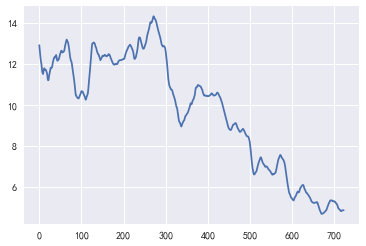

In [58]:
file_name('F:\新建文件夹1')

In [111]:
import cv2
import numpy as np

# 感知哈希算法(pHash)
def pHash(img):
    # 缩放32*32
    img = cv2.resize(img, (32, 32))  # , interpolation=cv2.INTER_CUBIC

    # 转换为灰度图
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 将灰度图转为浮点型，再进行dct变换
    dct = cv2.dct(np.float32(gray))
    # opencv实现的掩码操作
    dct_roi = dct[0:8, 0:8]

    hash = []
    avreage = np.mean(dct_roi)
    for i in range(dct_roi.shape[0]):
        for j in range(dct_roi.shape[1]):
            if dct_roi[i, j] > avreage:
                hash.append(1)
            else:
                hash.append(0)
    return hash

# Hash值对比
def cmpHash(hash1, hash2):
    if(len(hash1)!=len(hash2)):
        return -1
    sim = 0
    for i in range(0,len(hash1)):
        if hash1[i]==hash2[i]:
            sim+=1
    return sim/len(hash1)

In [116]:
cv_img1=cv2.imdecode(np.fromfile('F:/结果图/SH#600007.jpg',dtype=np.uint8),-1)
hash1 = pHash(cv_img1)
for root, dirs, files in os.walk('F:\新建文件夹1'):  
        for fName in files:
            fn = 'F:\\结果图\\'+fName.split('.')[0]+'.jpg'
            cv_img2=cv2.imdecode(np.fromfile(fn,dtype=np.uint8),-1)
            hash2 = pHash(cv_img2)
            n = cmpHash(hash1, hash2)
            if(n>0.99):
                print(fn)

F:\结果图\SH#600007.jpg
F:\结果图\SH#600008.jpg
F:\结果图\SH#600009.jpg
F:\结果图\SH#600011.jpg
F:\结果图\SH#600018.jpg
F:\结果图\SH#600020.jpg
F:\结果图\SH#600023.jpg
F:\结果图\SH#600027.jpg
F:\结果图\SH#600030.jpg
F:\结果图\SH#600037.jpg
F:\结果图\SH#600048.jpg
F:\结果图\SH#600054.jpg
F:\结果图\SH#600055.jpg
F:\结果图\SH#600056.jpg
F:\结果图\SH#600057.jpg
F:\结果图\SH#600059.jpg
F:\结果图\SH#600060.jpg
F:\结果图\SH#600061.jpg
F:\结果图\SH#600062.jpg
F:\结果图\SH#600064.jpg
F:\结果图\SH#600066.jpg
F:\结果图\SH#600067.jpg
F:\结果图\SH#600068.jpg
F:\结果图\SH#600072.jpg
F:\结果图\SH#600073.jpg
F:\结果图\SH#600082.jpg
F:\结果图\SH#600085.jpg
F:\结果图\SH#600089.jpg
F:\结果图\SH#600093.jpg
F:\结果图\SH#600096.jpg
F:\结果图\SH#600098.jpg
F:\结果图\SH#600101.jpg
F:\结果图\SH#600103.jpg
F:\结果图\SH#600111.jpg
F:\结果图\SH#600113.jpg
F:\结果图\SH#600114.jpg
F:\结果图\SH#600115.jpg
F:\结果图\SH#600118.jpg
F:\结果图\SH#600119.jpg
F:\结果图\SH#600120.jpg
F:\结果图\SH#600128.jpg
F:\结果图\SH#600129.jpg
F:\结果图\SH#600130.jpg
F:\结果图\SH#600132.jpg
F:\结果图\SH#600136.jpg
F:\结果图\SH#600138.jpg
F:\结果图\SH#600146.jpg
F:\结果图\SH#600

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\结果图\\SH#600890.jpg'